## Linear_Regression, one variable, multiple variable, Polyomial Regression.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C://Users//hp//Desktop//Tableau data sets//housing.csv",header=None,sep ='\s+')
df.columns= ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


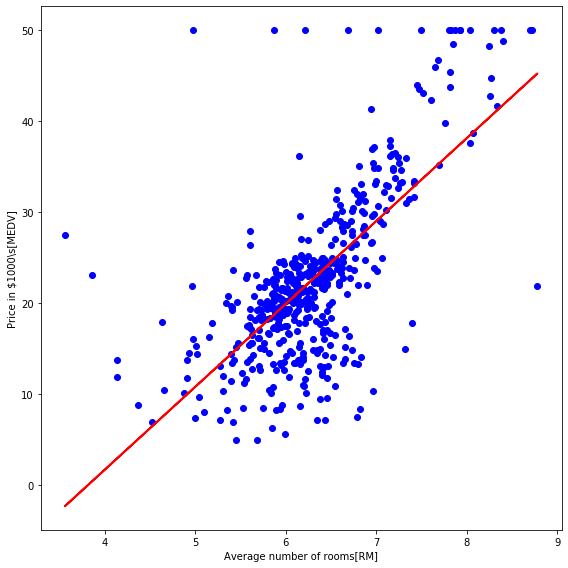

In [3]:
from sklearn.linear_model import LinearRegression

x=df[['RM']].values
y=df['MEDV'].values

model = LinearRegression()
model.fit(x,y)

plt.subplots(figsize=(8,8))
plt.scatter(x,y, c='blue')
plt.plot(x,model.predict(x),color='red',linewidth=2)
plt.xlabel('Average number of rooms[RM]')
plt.ylabel('Price in $1000\s[MEDV]')
plt.tight_layout()
plt.show()

### This belongs to the Linear_Regression with one varible.

## Evaluating the performance of Linear_Regression with one variable  models

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('Residual sum of squares train: %.2f' % np.mean((model.predict(x_train)- y_train) ** 2))
print('Residual sum of squares test: %.2f' % np.mean((model.predict(x_test)- y_test) ** 2))

Residual sum of squares train: 42.16
Residual sum of squares test: 47.03


## Linear_Regression with multiple variables (Multiple Linear_Regression)

In [6]:
x=df[['RM','LSTAT','CRIM','ZN','INDUS','CHAS','TAX','RAD','DIS','PTRATIO','B','NOX']].values
y=df['MEDV'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

print('Residual sum of squares train: %.2f' % np.mean((model.predict(x_train)- y_train) ** 2))
print('Residual sum of squares test: %.2f' % np.mean((model.predict(x_test)- y_test) ** 2))


Residual sum of squares train: 19.98
Residual sum of squares test: 27.04


## Polynomial Regression 

In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def polynomialRegression(degree):
    
    x = df[['LSTAT']].values
    y = df['MEDV'].values
    
    quadratic_featurizer = PolynomialFeatures(degree)
    x_quadratic = quadratic_featurizer.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x_quadratic,y,test_size=0.3, random_state=0)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(x_train, y_train)
    
    print('Residual sum of squares train: %.2f' % np.mean((regressor_quadratic.predict(x_train)- y_train) ** 2))
    print('Residual sum of squares test: %.2f' % np.mean((regressor_quadratic.predict(x_test)- y_test) ** 2))
    
    

In [8]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [9]:
i = interact(polynomialRegression, degree=(1,100))

interactive(children=(IntSlider(value=50, description='degree', min=1), Output()), _dom_classes=('widget-inter…